In [91]:
from deepchecks.suites import full_suite

In [4]:
# ! pip install deepchecks --upgrade -q
from deepchecks.tabular.suites import full_suite
from deepchecks.tabular import Dataset


ModuleNotFoundError: No module named 'deepchecks.tabular'

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pycaret

In [7]:
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)

In [8]:
seasonal_df = pd.read_csv('../data/seasonal_dataset.csv', sep='\t')
seasonal_phen_df = pd.read_csv('../data/seasonal_phen_dataset.csv', sep='\t')

# EDA to justify data cleaning  

In [9]:
seasonal_df.head()

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,mean_savi2,min_savi2,max_savi2,skew_savi2,kurt_savi2,std_savi2,mean_ndwi,min_ndwi,max_ndwi,skew_ndwi,kurt_ndwi,std_ndwi,mean_savi,min_savi,max_savi,skew_savi,kurt_savi,std_savi,mean_mndvi,min_mndvi,max_mndvi,skew_mndvi,kurt_mndvi,std_mndvi,mean_ndmi,min_ndmi,max_ndmi,skew_ndmi,kurt_ndmi,std_ndmi,mean_evi,min_evi,max_evi,skew_evi,kurt_evi,std_evi,mean_arvi,min_arvi,max_arvi,skew_arvi,kurt_arvi,std_arvi,mean_ndvi,min_ndvi,max_ndvi,skew_ndvi,kurt_ndvi,std_ndvi,mean_msavi,min_msavi,max_msavi,skew_msavi,kurt_msavi,std_msavi,mean_cri,min_cri,max_cri,skew_cri,kurt_cri,std_cri,mean_cari,min_cari,max_cari,skew_cari,kurt_cari,std_cari,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp
0,AL549648Z,CR196HWQ141Z,3720.0,0.034516,0.022804,0.044988,-0.494315,NaN,0.011144,-0.703579,-0.817066,-0.536838,1.412881,NaN,0.147510,0.240046,-0.494315,0.809575,0.042332,-0.477363,0.376083,1.121969,1.051180,1.221244,1.297945,NaN,0.088538,0.262918,0.120206,0.355849,-1.504415,NaN,0.125461,0.779285,0.477011,1.004268,-1.175489,NaN,0.271993,0.712977,0.544909,0.818598,-1.565798,NaN,0.147143,0.952844,0.088538,1.297945,-1.730873,3.252084,0.348872,0.637284,0.375433,0.809575,-1.484466,NaN,0.230512,4.520818,3.662016,5.898924,1.578787,NaN,1.205486,0.329256,0.294461,0.348998,-1.685287,NaN,0.030225,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.936170,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.936170,180.106383,175.170213,180.042553,58.234043,184.446809,123.297872,226.319149,4.575,0.0,80.0,4.370865,24.614484,366.0,25.455140,23.875,27.5,0.166153,-0.883704,22.6500,21.0,23.0,-0.939848,-0.433482,30.800,27.0,34.0,-0.581393,-0.728228
1,AL549649Z,CR196NSMKZ,3600.0,0.037360,0.029283,0.042867,-1.408678,NaN,0.007148,-0.735926,-0.799896,-0.628707,1.636704,NaN,0.093431,0.200805,-1.408678,0.803138,-1.742472,4.648706,0.565261,1.088668,1.084409,1.096759,1.724813,NaN,0.007010,0.309345,0.194709,0.378183,-1.629082,NaN,0.099944,0.862194,0.668208,0.977748,-1.638534,NaN,0.169019,0.760314,0.666682,0.812342,-1.700019,NaN,0.081254,0.977445,0.007010,1.724813,-0.915355,3.871753,0.407054,0.700318,0.544379,0.803138,-1.480268,NaN,0.137314,4.727697,3.133038,6.226470,-0.277505,NaN,1.548944,0.352015,0.326497,0.390450,1.466427,NaN,0.033877,LVAd,132.430769,93.646154,79.461538,115.646154,214.353846,259.123077,610.861538,208.138462,40.138462,610.861538,573.169231,616.630769,518.969231,175.323077,167.630769,174.830769,58.076923,188.215385,127.953846,203.553846,4.575,0.0,80.0,4.370865,24.614484,366.0,25.455140,23.875,27.5,0.166153,-0.883704,22.6500,21.0,23.0,-0.939848,-0.433482,30.800,27.0,34.0,-0.581393,-0.728228
2,AL549319Z,CR196NSLNZ,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LVAd,132.037037,107.148148,93.851852,134.111111,211.814815,259.259259,609.074074,207.925926,40.592593,609.074074,569.962963,612.962963,522.444444,179.222222,170.777778,178.962963,57.518519,190.037037,134.148148,207.814815,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL549320Z,CR196NSLPZ,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

As part of the EDA we would like to check if we have duplicated and nan values

In [10]:
seasonal_df.shape, seasonal_df.drop_duplicates().shape

((3236, 111), (3224, 111))

In [11]:
seasonal_phen_df.shape,seasonal_phen_df.drop_duplicates().shape, seasonal_phen_df.drop_duplicates(subset= ['plot code','Season code']).shape

((3224, 340), (3224, 340), (3221, 340))

We can see that any place without plot code has no data 

In [12]:
seasonal_df[seasonal_df['plot code'].isna()].dropna(how='all',axis=1)

,Sitlav - Soybeans - Yield - KG/Ha,sum_rain
1176,5095.6,0.0
1177,5095.6,0.0
1178,5095.6,0.0
1179,5095.6,0.0
1831,3240.0,0.0
1832,3240.0,0.0
1833,3240.0,0.0
1834,3240.0,0.0
2007,3011.0,0.0
2008,3011.0,0.0


In [13]:
seasonal_phen_df[seasonal_phen_df['plot code'].isna()].dropna(how='all',axis=1)

,Sitlav - Soybeans - Yield - KG/Ha,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4
1176,5095.6,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1828,3240.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,3011.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2646,4099.7,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print(seasonal_phen_df.shape)
seasonal_phen_df = seasonal_phen_df.dropna(subset=['plot code'])
print(seasonal_phen_df.shape)


(3224, 340)
(3220, 340)


In [15]:
print(seasonal_df.shape)
seasonal_df = seasonal_df.dropna(subset=['plot code'])
print(seasonal_df.shape)


(3236, 111)
(3220, 111)


In [16]:
seasonal_df[seasonal_df.duplicated(subset =['plot code','Season code'], keep=False)].dropna(axis=1,how='all')

""


In [17]:
# We can do the same process on the phen data  
seasonal_phen_df[seasonal_phen_df.duplicated(subset =['plot code','Season code'], keep=False)].dropna(axis=1,how='all')

""


In [18]:
seasonal_phen_df.head()

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,mean_phen_savi2_1,max_phen_savi2_1,std_phen_savi2_1,skew_phen_savi2_1,kurt_phen_savi2_1,mean_phen_savi2_2,max_phen_savi2_2,std_phen_savi2_2,skew_phen_savi2_2,kurt_phen_savi2_2,mean_phen_savi2_3,max_phen_savi2_3,std_phen_savi2_3,skew_phen_savi2_3,kurt_phen_savi2_3,mean_phen_savi2_4,max_phen_savi2_4,std_phen_savi2_4,skew_phen_savi2_4,kurt_phen_savi2_4,mean_phen_ndwi_1,max_phen_ndwi_1,std_phen_ndwi_1,skew_phen_ndwi_1,kurt_phen_ndwi_1,mean_phen_ndwi_2,max_phen_ndwi_2,std_phen_ndwi_2,skew_phen_ndwi_2,kurt_phen_ndwi_2,mean_phen_ndwi_3,max_phen_ndwi_3,std_phen_ndwi_3,skew_phen_ndwi_3,kurt_phen_ndwi_3,mean_phen_ndwi_4,max_phen_ndwi_4,std_phen_ndwi_4,skew_phen_ndwi_4,kurt_phen_ndwi_4,mean_phen_savi_1,max_phen_savi_1,std_phen_savi_1,skew_phen_savi_1,kurt_phen_savi_1,mean_phen_savi_2,max_phen_savi_2,std_phen_savi_2,skew_phen_savi_2,kurt_phen_savi_2,mean_phen_savi_3,max_phen_savi_3,std_phen_savi_3,skew_phen_savi_3,kurt_phen_savi_3,mean_phen_savi_4,max_phen_savi_4,std_phen_savi_4,skew_phen_savi_4,kurt_phen_savi_4,mean_phen_mndvi_1,max_phen_mndvi_1,std_phen_mndvi_1,skew_phen_mndvi_1,kurt_phen_mndvi_1,mean_phen_mndvi_2,max_phen_mndvi_2,std_phen_mndvi_2,skew_phen_mndvi_2,kurt_phen_mndvi_2,mean_phen_mndvi_3,max_phen_mndvi_3,std_phen_mndvi_3,skew_phen_mndvi_3,kurt_phen_mndvi_3,mean_phen_mndvi_4,max_phen_mndvi_4,std_phen_mndvi_4,skew_phen_mndvi_4,kurt_phen_mndvi_4,mean_phen_ndmi_1,max_phen_ndmi_1,std_phen_ndmi_1,skew_phen_ndmi_1,kurt_phen_ndmi_1,mean_phen_ndmi_2,max_phen_ndmi_2,std_phen_ndmi_2,skew_phen_ndmi_2,kurt_phen_ndmi_2,mean_phen_ndmi_3,max_phen_ndmi_3,std_phen_ndmi_3,skew_phen_ndmi_3,kurt_phen_ndmi_3,mean_phen_ndmi_4,max_phen_ndmi_4,std_phen_ndmi_4,skew_phen_ndmi_4,kurt_phen_ndmi_4,mean_phen_evi_1,max_phen_evi_1,std_phen_evi_1,skew_phen_evi_1,kurt_phen_evi_1,mean_phen_evi_2,max_phen_evi_2,std_phen_evi_2,skew_phen_evi_2,kurt_phen_evi_2,mean_phen_evi_3,max_phen_evi_3,std_phen_evi_3,skew_phen_evi_3,kurt_phen_evi_3,mean_phen_evi_4,max_phen_evi_4,std_phen_evi_4,skew_phen_evi_4,kurt_phen_evi_4,mean_phen_arvi_1,max_phen_arvi_1,std_phen_arvi_1,skew_phen_arvi_1,kurt_phen_arvi_1,mean_phen_arvi_2,max_phen_arvi_2,std_phen_arvi_2,skew_phen_arvi_2,kurt_phen_arvi_2,mean_phen_arvi_3,max_phen_arvi_3,std_phen_arvi_3,skew_phen_arvi_3,kurt_phen_arvi_3,mean_phen_arvi_4,max_phen_arvi_4,std_phen_arvi_4,skew_phen_arvi_4,kurt_phen_arvi_4,mean_phen_ndvi_1,max_phen_ndvi_1,std_phen_ndvi_1,skew_phen_ndvi_1,kurt_phen_ndvi_1,mean_phen_ndvi_2,max_phen_ndvi_2,std_phen_ndvi_2,skew_phen_ndvi_2,kurt_phen_ndvi_2,mean_phen_ndvi_3,max_phen_ndvi_3,std_phen_ndvi_3,skew_phen_ndvi_3,kurt_phen_ndvi_3,mean_phen_ndvi_4,max_phen_ndvi_4,std_phen_ndvi_4,skew_phen_ndvi_4,kurt_phen_ndvi_4,mean_phen_msavi_1,max_phen_msavi_1,std_phen_msavi_1,skew_phen_msavi_1,kurt_phen_msavi_1,mean_phen_msavi_2,max_phen_msavi_2,std_phen_msavi_2,skew_phen_msavi_2,kurt_phen_msavi_2,mean_phen_msavi_3,max_phen_msavi_3,std_phen_msavi_3,skew_phen_msavi_3,kurt_phen_msavi_3,mean_phen_msavi_4,max_phen_msavi_4,std_phen_msavi_4,skew_phen_msavi_4,kurt_phen_msavi_4,mean_phen_cri_1,max_phen_cri_1,std_phen_cri_1,skew_phen_cri_1,kurt_phen_cri_1,mean_phen_cri_2,max_phen_cri_2,std_phen_cri_2,skew_phen_cri_2,kurt_phen_cri_2,mean_phen_cri_3,max_phen_cri_3,std_phen_cri_3,skew_phen_cri_3,kurt_phen_cri_3,mean_phen_cri_4,max_phen_cri_4,std_phen_cri_4,skew_phen_cri_4,kurt_phen_cri_4,mean_phen_cari_1,max_phen_cari_1,std_phen_cari_1,skew_phen_cari_1,kurt_phen_cari_1,mean_phen_cari_2,max_phen_cari_2,std_phen_cari_2,skew_phen_cari_2,kurt_phen_cari_2,mean_phen_cari_3,max_phen_cari_3,std_phen_cari_3,skew_phen_cari_3,kurt_phen_cari_3,mean_phen_cari_4,max_phen_cari_4,std_phen_cari_4,skew_phen_cari_4,kurt_phen_cari_4,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4,daily rainmean_1,da

In [19]:
# As we see the data with duplicated values does not contain any information so we can drop those columns
seasonal_df = seasonal_df.drop_duplicates(subset =['plot code','Season code'], keep=False)
seasonal_phen_df = seasonal_phen_df.drop_duplicates(subset =['plot code','Season code'], keep=False)

In [20]:
seasonal_df.shape,seasonal_phen_df.shape 

((3220, 111), (3220, 340))

In [21]:
seasonal_df.loc[(seasonal_df['plot code']=='AL549648Z')]

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,mean_savi2,min_savi2,max_savi2,skew_savi2,kurt_savi2,std_savi2,mean_ndwi,min_ndwi,max_ndwi,skew_ndwi,kurt_ndwi,std_ndwi,mean_savi,min_savi,max_savi,skew_savi,kurt_savi,std_savi,mean_mndvi,min_mndvi,max_mndvi,skew_mndvi,kurt_mndvi,std_mndvi,mean_ndmi,min_ndmi,max_ndmi,skew_ndmi,kurt_ndmi,std_ndmi,mean_evi,min_evi,max_evi,skew_evi,kurt_evi,std_evi,mean_arvi,min_arvi,max_arvi,skew_arvi,kurt_arvi,std_arvi,mean_ndvi,min_ndvi,max_ndvi,skew_ndvi,kurt_ndvi,std_ndvi,mean_msavi,min_msavi,max_msavi,skew_msavi,kurt_msavi,std_msavi,mean_cri,min_cri,max_cri,skew_cri,kurt_cri,std_cri,mean_cari,min_cari,max_cari,skew_cari,kurt_cari,std_cari,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp
0,AL549648Z,CR196HWQ141Z,3720.0,0.034516,0.022804,0.044988,-0.494315,NaN,0.011144,-0.703579,-0.817066,-0.536838,1.412881,NaN,0.147510,0.240046,-0.494315,0.809575,0.042332,-0.477363,0.376083,1.121969,1.051180,1.221244,1.297945,NaN,0.088538,0.262918,0.120206,0.355849,-1.504415,NaN,0.125461,0.779285,0.477011,1.004268,-1.175489,NaN,0.271993,0.712977,0.544909,0.818598,-1.565798,NaN,0.147143,0.952844,0.088538,1.297945,-1.730873,3.252084,0.348872,0.637284,0.375433,0.809575,-1.484466,NaN,0.230512,4.520818,3.662016,5.898924,1.578787,NaN,1.205486,0.329256,0.294461,0.348998,-1.685287,NaN,0.030225,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.93617,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.93617,180.106383,175.170213,180.042553,58.234043,184.446809,123.297872,226.319149,4.57500,0.0,80.0,4.370865,24.614484,366.0,25.455140,23.875000,27.500000,0.166153,-0.883704,22.6500,21.0,23.0,-0.939848,-0.433482,30.8000,27.0,34.0,-0.581393,-0.728228
1051,AL549648Z,CR196NSQ0HKZ,3390.5,0.017349,0.006412,0.025671,-1.106251,NaN,0.009892,-0.469392,-0.633131,-0.286196,0.496099,NaN,0.174284,0.016176,-1.106251,0.436442,-2.612986,9.161625,0.352623,0.486344,0.276593,0.764598,1.136230,NaN,0.251111,-0.078829,-0.282838,0.063572,-1.352914,NaN,0.181236,0.223805,0.098993,0.464084,1.728122,NaN,0.208140,0.337546,0.112912,0.572085,0.193641,NaN,0.229747,0.498221,0.134346,1.136230,0.986499,0.624551,0.296674,0.205878,0.088434,0.436442,1.731137,NaN,0.199686,30.774844,1.046945,81.908395,1.664081,NaN,44.478028,0.352124,0.139135,0.526590,-0.847998,NaN,0.196579,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.93617,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.93617,180.106383,175.170213,180.042553,58.234043,184.446809,123.297872,226.319149,5.07500,0.0,115.0,5.081694,30.575214,406.0,26.387274,22.875000,28.833333,-0.421580,-0.361988,22.8125,21.0,24.0,-0.256167,0.181263,31.4375,25.0,36.0,-0.623114,0.127067
2147,AL549648Z,CR196PALXZ,1297.0,0.033646,0.022360,0.043992,-0.299722,-1.73571,0.008823,-0.652929,-0.807819,-0.316392,1.345878,0.906697,0.210803,0.177080,-1.735710,0.798778,-2.022600,6.853856,0.549845,0.864115,0.306520,1.050888,-2.086169,4.405172,0.316237,0.152880,-0.272695,0.335084,-1.488882,1.629899,0.260259,0.681963,0.133400,0.994365,-1.258730,0.957419,0.345739,0.630808,0.135565,0.822953,-1.740167,2.807116,0.292434,0.786595,-2.086169,4.405172,0.945731,6.691288,1.231246,0.577064,0.117731,0.798778,-1.287328,0.639461,0.290638,5.685006,1.420185,12.219902,1.330045,2.873622,3.968052,0.393814,0.250461,0.582433,0.627169,0.313243,0.127338,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.93617,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.

In [22]:
# We would like to check if we have info in the Season code data but it seems to be a unique value 
seasonal_phen_df['Season code'].value_counts().nlargest(4)

CR196HWQ141Z    1
CR196IL6IGTZ    1
CR196PAM5Z      1
CR196PAM6Z      1
Name: Season code, dtype: int64

In [23]:
# When looking per plot it seems like some of them have several seasons 
seasonal_df.groupby(['plot code','Season code']).size().nlargest()

plot code  Season code 
AL544540Z  CR196IKKIJ5Z    1
           CR196LWQ0DXZ    1
           CR196PUJKZ      1
AL544541Z  CR196J6Q05CZ    1
           CR196P7HHZ      1
dtype: int64

<Axes: >

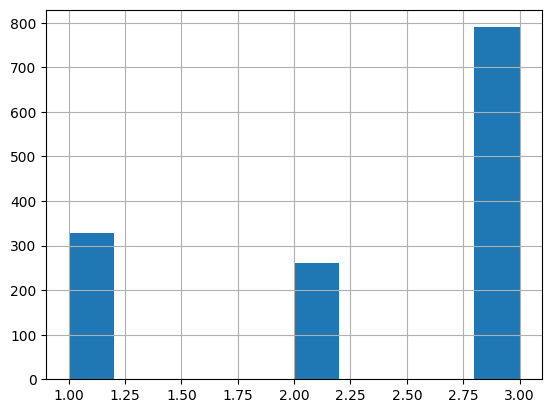

In [53]:
seasonal_phen_df.groupby(['plot code']).size().hist()

We would like to work with minimum 70-80% of non-missing values. As we have 3220 rows we can set a trashold of 750 missing values tops 

In [26]:
nan_trashold = 2500
print(seasonal_df.shape)
print(seasonal_df.dropna(axis=1, thresh=int(nan_trashold)).shape)
clean_seasonal_df = seasonal_df.dropna(axis=1, thresh=int(nan_trashold))

(3220, 111)
(3220, 30)


In [27]:
col_nan_trashold = 2500
print(seasonal_phen_df.shape)
print(seasonal_phen_df.dropna(axis=1, thresh=int(col_nan_trashold)).shape)
clean_seasonal_phen_df = seasonal_phen_df.dropna(axis=1, thresh=int(col_nan_trashold))

(3220, 340)
(3220, 60)


In [28]:
row_nan_trashold = clean_seasonal_phen_df.shape[1]*0.5
row_nan_trashold

30.0

In [29]:
print(clean_seasonal_phen_df.shape)
print(clean_seasonal_phen_df.dropna(axis=0, thresh=row_nan_trashold).shape)
clean_seasonal_phen_df = clean_seasonal_phen_df.dropna(axis=0, thresh=row_nan_trashold)

(3220, 60)
(3220, 60)


In [30]:
clean_seasonal_phen_df.isna().sum(axis=1).value_counts()

0     2781
20     439
dtype: int64

# Filtering nan values

In [32]:
def filter_nans(df, row_trashold=0.5 ,col_trashold=0.7):
    df = df.dropna(subset=['plot code']).drop(columns= ['Season code'])
    row_nan_trashold = df.shape[1]*row_trashold
    df = df.dropna(axis=0, thresh=int(row_nan_trashold))
    col_nan_trashold = df.shape[0]*col_trashold
    df = df.dropna(axis=1, thresh=int(col_nan_trashold))
    return df 
            
        

In [60]:
seasonal_df_filterd = filter_nans(seasonal_df)
phen_df_filterd = filter_nans(seasonal_phen_df)


# Columns correlation EDA

In [61]:
def plot_corr_marix(df):
    corr_matrix = df.round(3).corr()
    mask = np.tril(np.ones_like(df.corr()))
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask)
    return corr_matrix

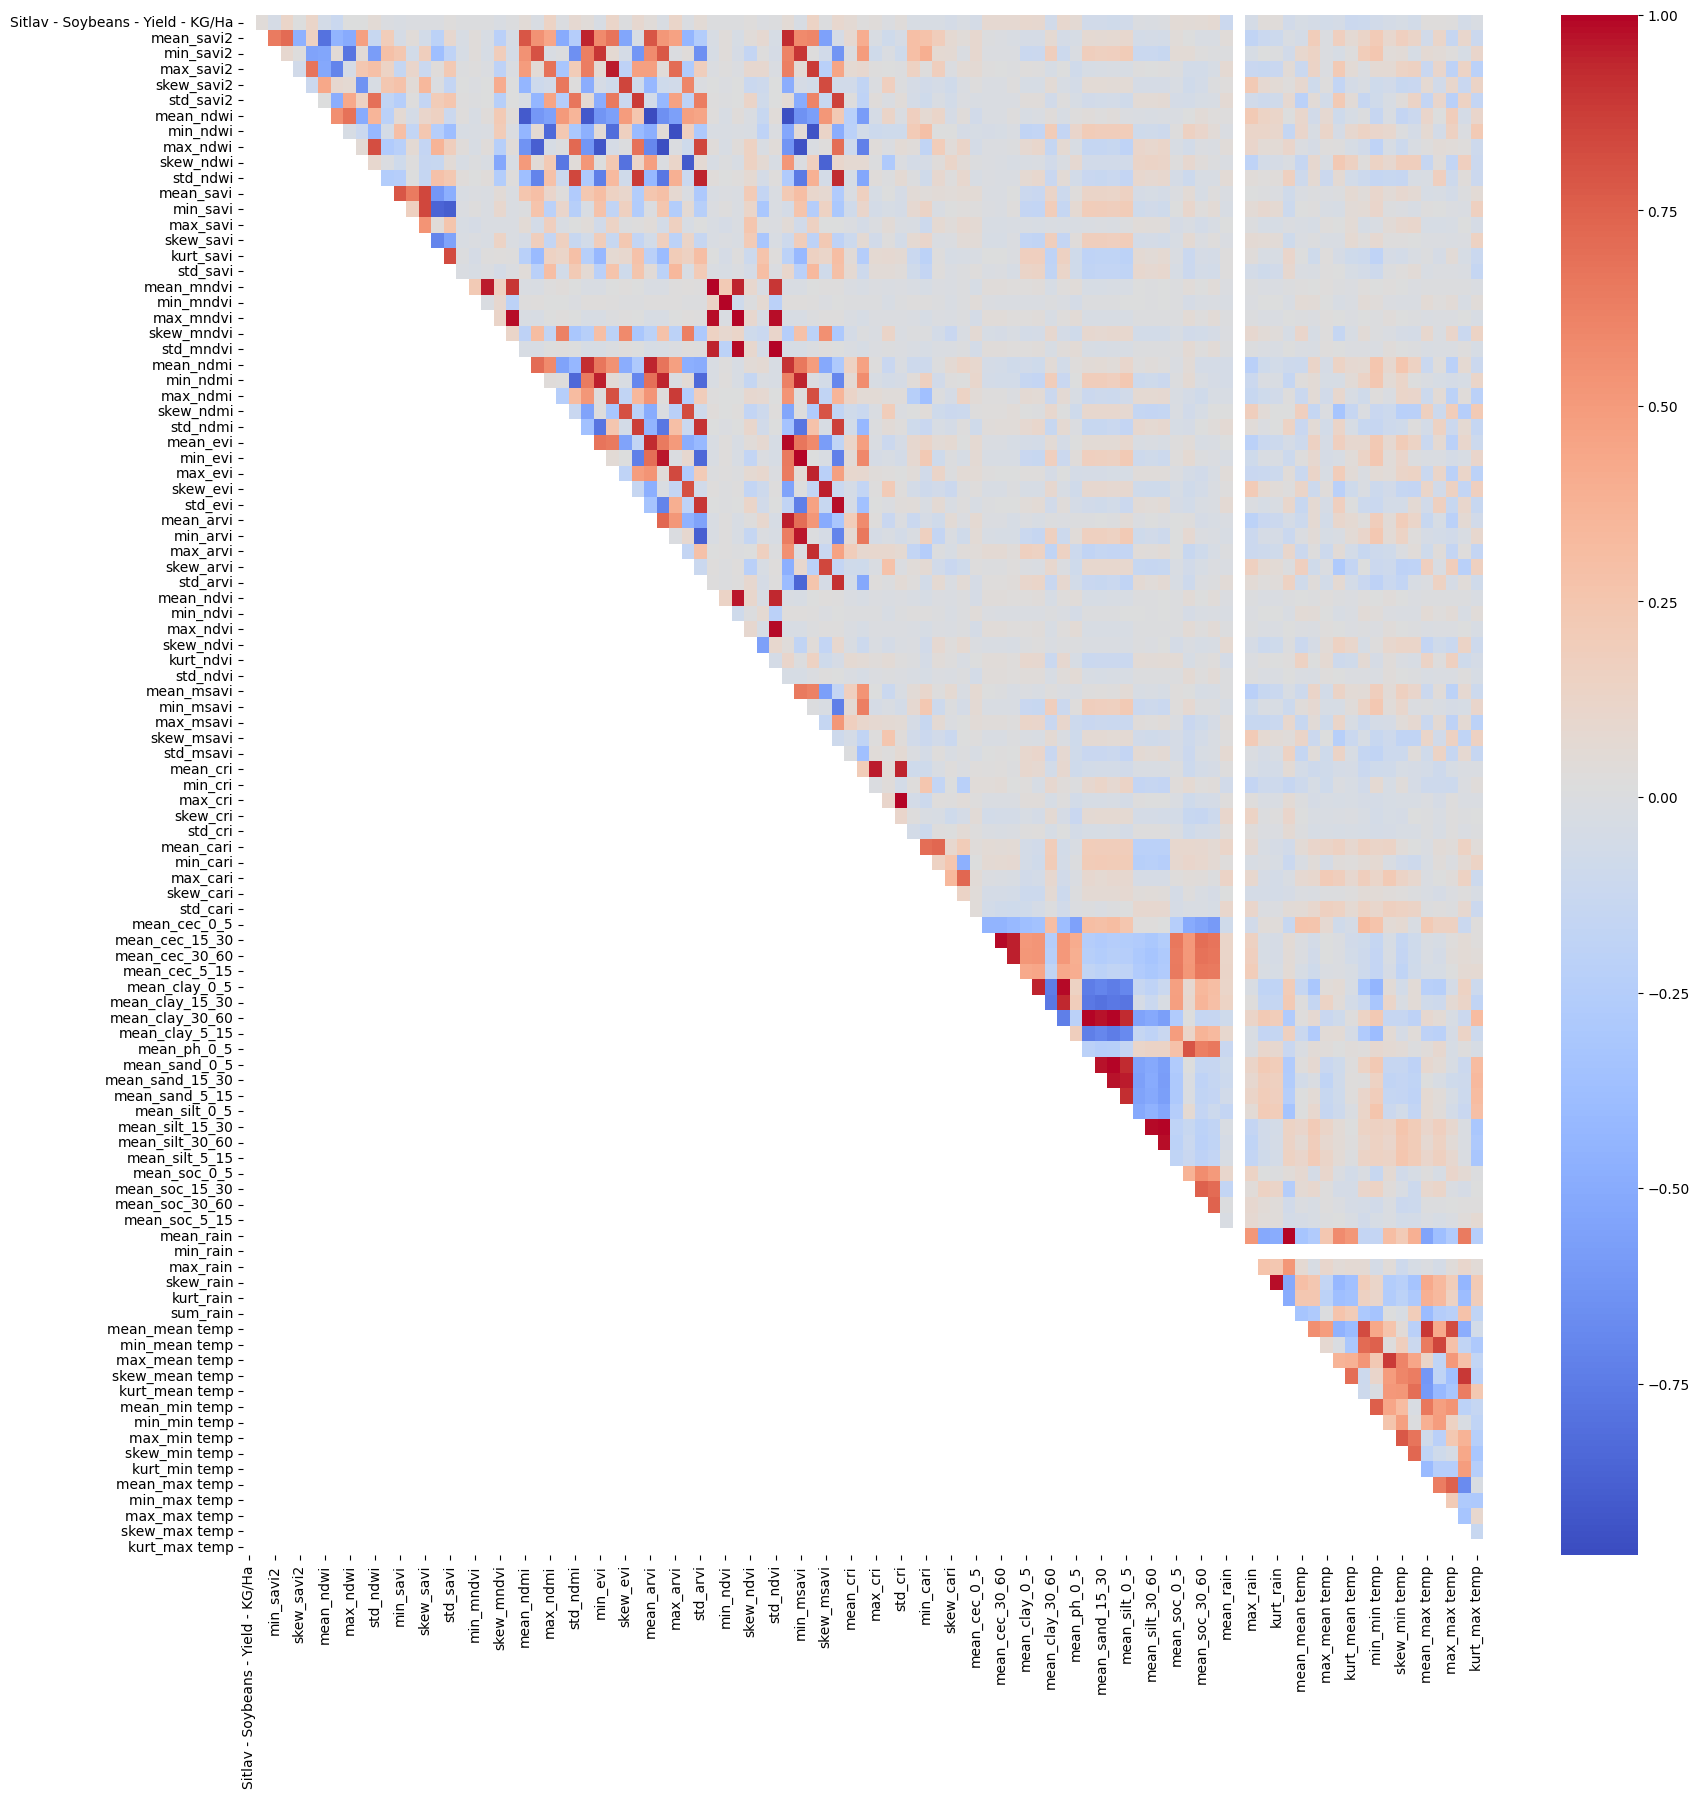

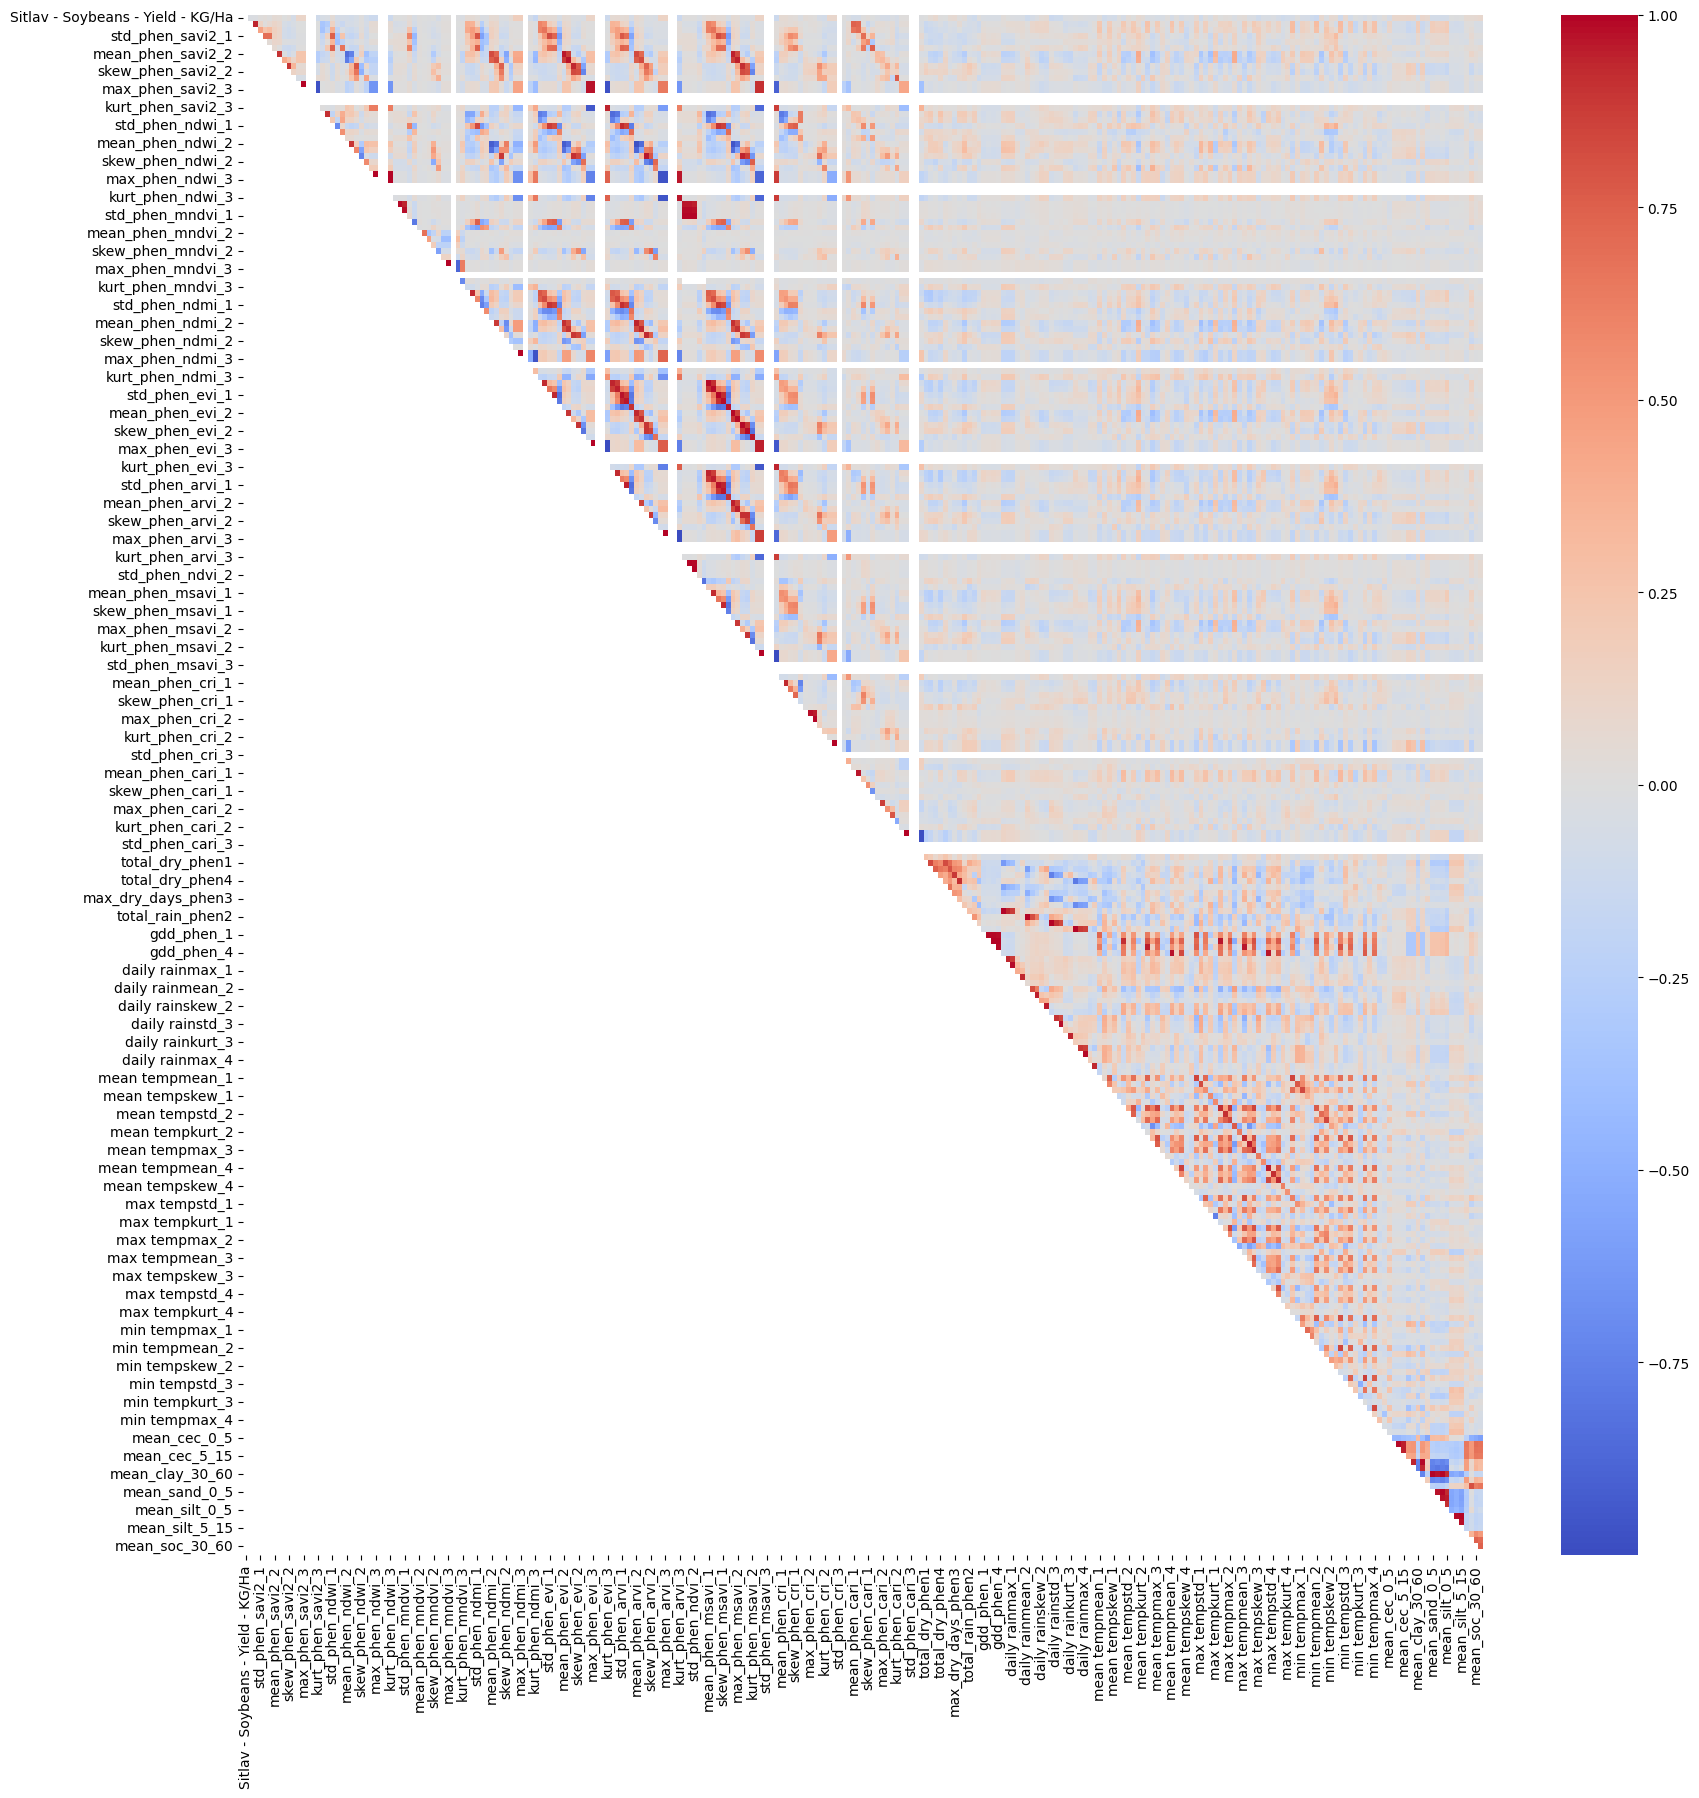

In [62]:
cor_season = plot_corr_marix(seasonal_df_filterd)
cor_phen = plot_corr_marix(phen_df_filterd)

We can see that most of the correlated columns are related to the same variables. We can preprocess the data and drop above 0.9 correlated columns but a better approach would be feature selection.
Also when rounding the values we can see that some columns does not contain any values   

# Target EDA

We can see that the target histogram has an unusual tail upwards and also downwards those could be outliers 

<Axes: xlabel='Sitlav - Soybeans - Yield - KG/Ha', ylabel='Count'>

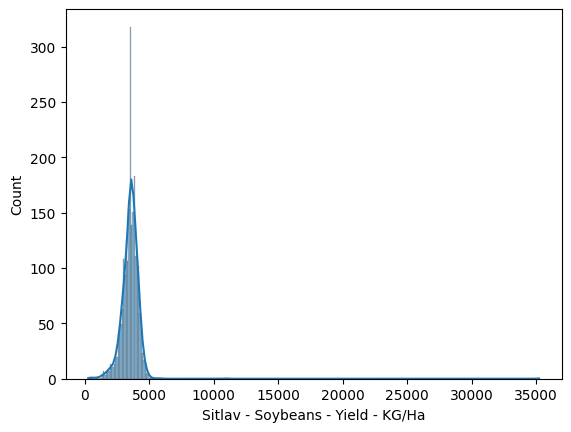

In [63]:
sns.histplot(seasonal_df_filterd['Sitlav - Soybeans - Yield - KG/Ha'], kde=True)

In [64]:
seasonal_df_filterd['Sitlav - Soybeans - Yield - KG/Ha'].nlargest(10)

987     35220.0
1454    10960.3
2451     5888.2
2752     5621.3
2245     5248.4
2385     5078.4
2589     5041.6
2367     4910.2
549      4908.0
3071     4898.2
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: float64

In [65]:
seasonal_df_filterd['Sitlav - Soybeans - Yield - KG/Ha'].nsmallest(10)

3229     285.9
2958     451.9
2219     506.4
2687     581.9
779      618.0
2151     892.0
2476     970.2
2355    1038.4
2680    1083.1
2147    1297.0
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: float64

In [66]:
def clean_target_colunm(df, target):
    target_std = df[target].std()
    target_mean = df[target].mean()
    low_trashold = target_mean-2.5*target_std
    high_trashold = target_mean+2.5*target_std
    df  = df.loc[(df[target]>low_trashold) & (df[target]< high_trashold)]
    return df 


In [68]:
seasonal_df_filterd = clean_target_colunm(seasonal_df_filterd, 'Sitlav - Soybeans - Yield - KG/Ha')

<Axes: xlabel='Sitlav - Soybeans - Yield - KG/Ha', ylabel='Count'>

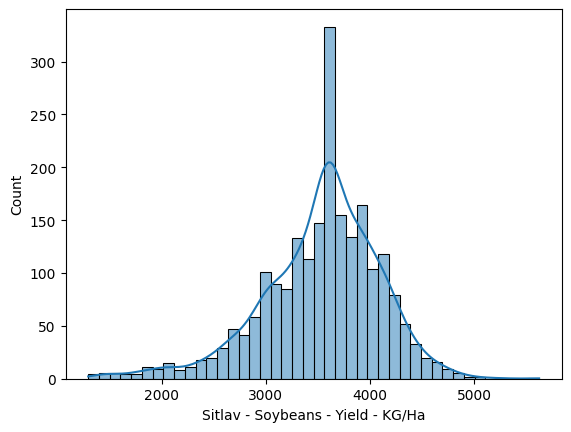

In [69]:
sns.histplot(seasonal_df_filterd['Sitlav - Soybeans - Yield - KG/Ha'], kde=True)

We can say that the same plot could have an avg change of yield of 430 kg/ha depending on the season but it could also be affected by the filed's age

426.20608018993363

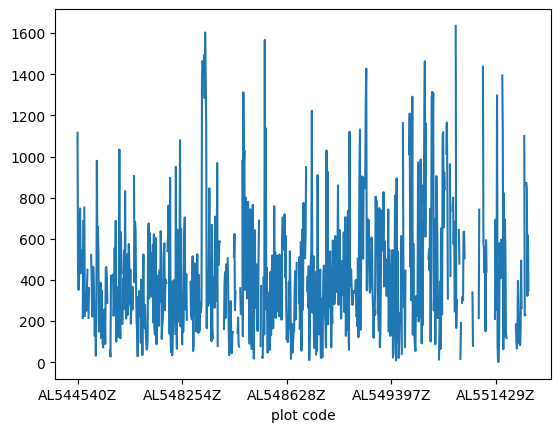

In [70]:
seasonal_df_filterd.groupby('plot code')['Sitlav - Soybeans - Yield - KG/Ha'].std().plot()
seasonal_df_filterd.groupby('plot code')['Sitlav - Soybeans - Yield - KG/Ha'].std().mean()

In [71]:
seasonal_df_filterd.CLASSE_DOM.value_counts()

LVAd    1232
RQo      581
LVd      213
PVAd     133
RLd       21
PVe        6
Name: CLASSE_DOM, dtype: int64

In [72]:
seasonal_df_filterd['Sitlav - Soybeans - Yield - KG/Ha'].agg(['min','max','mean','std'])

min     1297.000000
max     5621.300000
mean    3530.426715
std      567.392616
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: float64

In [76]:
seasonal_df_filterd.shape, seasonal_df_filterd.drop_duplicates().shape

((2186, 101), (2186, 101))

In [80]:
seasonal_df_filterd = seasonal_df_filterd.reset_index(drop=True)
label_col = 'Sitlav - Soybeans - Yield - KG/Ha'

y_bins_cat = pd.qcut(seasonal_df_filterd[label_col], q=10, labels=False)
y_bins_cat

0       6
1       4
2       4
3       4
4       3
       ..
2181    1
2182    3
2183    2
2184    2
2185    3
Name: Sitlav - Soybeans - Yield - KG/Ha, Length: 2186, dtype: int64

In [81]:
y_bins_cat.value_counts()

4    334
3    223
1    220
0    219
9    219
7    219
6    218
8    218
2    217
5     99
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: int64

In [87]:
seasonal_df_filterd[y_bins_cat==4].round(3).head(5)

,plot code,Sitlav - Soybeans - Yield - KG/Ha,mean_savi2,min_savi2,max_savi2,skew_savi2,std_savi2,mean_ndwi,min_ndwi,max_ndwi,skew_ndwi,std_ndwi,mean_savi,min_savi,max_savi,skew_savi,kurt_savi,std_savi,mean_mndvi,min_mndvi,max_mndvi,skew_mndvi,std_mndvi,mean_ndmi,min_ndmi,max_ndmi,skew_ndmi,std_ndmi,mean_evi,min_evi,max_evi,skew_evi,std_evi,mean_arvi,min_arvi,max_arvi,skew_arvi,std_arvi,mean_ndvi,min_ndvi,max_ndvi,skew_ndvi,kurt_ndvi,std_ndvi,mean_msavi,min_msavi,max_msavi,skew_msavi,std_msavi,mean_cri,min_cri,max_cri,skew_cri,std_cri,mean_cari,min_cari,max_cari,skew_cari,std_cari,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp
1,AL549649Z,3600.0,0.037,0.029,0.043,-1.409,0.007,-0.736,-0.800,-0.629,1.637,0.093,0.201,-1.409,0.803,-1.742,4.649,0.565,1.089,1.084,1.097,1.725,0.007,0.309,0.195,0.378,-1.629,0.100,0.862,0.668,0.978,-1.639,0.169,0.760,0.667,0.812,-1.700,0.081,0.977,0.007,1.725,-0.915,3.872,0.407,0.700,0.544,0.803,-1.480,0.137,4.728,3.133,6.226,-0.278,1.549,0.352,0.326,0.390,1.466,0.034,LVAd,132.431,93.646,79.462,115.646,214.354,259.123,610.862,208.138,40.138,610.862,573.169,616.631,518.969,175.323,167.631,174.831,58.077,188.215,127.954,203.554,4.575,0.0,80.0,4.371,24.614,366.00,25.455,23.875,27.500,0.166,-0.884,22.650,21.0,23.0,-0.940,-0.433,30.800,27.0,34.0,-0.581,-0.728
2,AL549324Z,3600.0,0.032,0.030,0.036,1.548,0.003,-0.728,-0.775,-0.645,1.687,0.072,0.379,0.003,1.548,1.432,2.554,0.442,1.092,1.033,1.164,0.850,0.066,0.294,0.205,0.353,-1.463,0.078,0.755,0.682,0.858,1.310,0.092,0.742,0.662,0.792,-1.574,0.070,0.901,0.066,1.164,-2.137,5.409,0.313,0.625,0.555,0.745,1.645,0.104,3.761,0.189,6.652,-0.892,3.285,0.310,0.216,0.370,-1.515,0.082,LVAd,129.235,106.647,94.353,137.000,219.059,256.529,587.706,213.000,39.471,587.706,553.000,594.059,499.471,192.706,190.471,193.353,58.059,180.059,120.824,227.471,4.575,0.0,80.0,4.371,24.614,366.00,25.471,23.875,27.500,0.133,-0.944,22.638,21.0,23.0,-0.876,-0.569,30.825,27.0,34.0,-0.589,-0.750
3,AL549650Z,3600.0,0.029,0.018,0.036,-1.370,0.008,-0.637,-0.791,-0.349,1.313,0.206,0.289,-1.370,2.431,0.983,5.792,0.712,0.885,0.418,1.077,-1.912,0.314,0.138,-0.294,0.362,-1.500,0.302,0.610,0.151,0.865,-1.553,0.319,0.596,0.184,0.795,-1.634,0.284,0.759,-1.912,3.680,0.346,5.262,1.136,0.519,0.135,0.752,-1.366,0.272,3.954,2.409,6.846,1.360,2.058,0.343,0.202,0.442,-1.049,0.103,LVAd,129.741,103.370,91.840,125.420,217.395,257.074,612.309,213.383,44.074,612.309,576.728,616.654,525.346,169.938,166.309,170.321,56.790,199.679,137.086,219.272,4.575,0.0,80.0,4.371,24.614,366.00,25.471,23.875,27.500,0.133,-0.944,22.638,21.0,23.0,-0.876,-0.569,30.825,27.0,34.0,-0.589,-0.750
10,AL549630Z,3600.0,0.035,0.017,0.049,-0.924,0.013,-0.660,-0.815,-0.354,1.475,0.215,0.327,-0.924,1.931,0.771,2.859,0.590,0.890,0.399,1.103,-1.930,0.329,0.165,-0.291,0.369,-1.698,0.313,0.737,0.155,1.078,-1.546,0.404,0.638,0.200,0.835,-1.774,0.298,0.780,-1.930,3.789,0.402,5.279,1.162,0.608,0.134,0.864,-1.584,0.328,4.903,2.250,6.539,-0.792,2.055,0.381,0.313,0.448,-0.088,0.056,LVAd,130.333,86.917,77.028,108.917,225.778,266.000,620.361,220.583,40.806,620.361,585.056,624.889,532.306,154.500,148.944,153.722,57.389,195.556,134.000,204.528,3.969,0.0,68.0,4.093,20.440,317.50,25.444,23.875,27.500,0.185,-0.906,22.675,22.0,23.0,-0.762,-1.457,30.725,27.0,34.0,-0.525,-0.851
11,AL548076Z,3600.0,0.035,0.032,0.038,NaN,0.004,-0.716,-0.762,-0.671,NaN,0.065,0.268,0.004,0.720,0.557,-2.023,0.311,0.978,0.940,1.015,NaN,0.053,0.296,0.278,0.313,NaN,0.025,0.799,0.7

<Axes: >

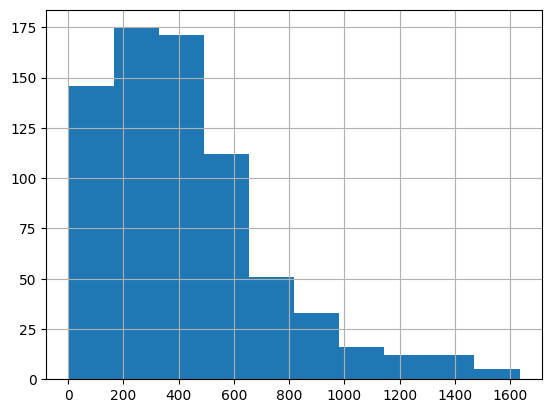

In [90]:
seasonal_df_filterd.fillna(0).groupby(['plot code'])['Sitlav - Soybeans - Yield - KG/Ha'].std().hist()

In [ ]:
def drop_corr_cols(df, trashold=0.9):
  # Get the correlation matrix
  corr_matrix = df.corr().abs()

  # Create a mask of the upper triangle of the correlation matrix
  upper_triangle_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)

  # Find the indices of the highly correlated features
  high_corr_features = np.where(corr_matrix > trashold)

  # Create a set of the feature names to drop
  cols_to_drop = set()

  # Add the names of the highly correlated features to the set
  for feature_idx1, feature_idx2 in zip(*high_corr_features):
      if feature_idx1 != feature_idx2 and upper_triangle_mask[feature_idx1, feature_idx2]:
          cols_to_drop.add(df.columns[feature_idx1])

  # Drop the highly correlated features from the DataFrame
  df = df.drop(columns=cols_to_drop)
  return df 

In [ ]:
def print_metrics(y_true, y_pred):
  r2 = r2_score(y_test, y_pred)
  print("R-squared: ", r2)
  mae = mean_absolute_error(y_test, y_pred)
  print("MAE: ", mae)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("RMSE: ", rmse)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


import lightgbm as lgbm

for c in join_df.columns:
    col_type = join_df[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        join_df[c] = join_df[c].astype('category')

X_train, X_test, y_train, y_test = train_test_split(join_df.drop(columns=['plot code','Season code',label_col]),join_df[label_col], random_state=0, stratify=y_bins_cat)
# Train Model
lgbm_reg = lgbm.LGBMRegressor(random_state=0, categorical_feature=['CLASSE_DOM'])
lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)
print_metrics(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.47067169442927614
MAE:  339.8336421174683
RMSE:  455.7254975279947


In [ ]:
lgbm_reg = lgbm.LGBMRegressor(random_state=0, categorical_feature=['CLASSE_DOM'],max_depth=4,min_split_gain=0.8,learning_rate=0.1,num_leaves=30)
lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)

print_metrics(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4396581185122789
MAE:  343.80069496256544
RMSE:  468.886048417681


In [ ]:
from sklearn.model_selection import KFold 

r2 = []
mae = []
rmse = []
X = join_df.drop(columns=['plot code','Season code',label_col])
y = join_df[label_col]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y_bins_cat)):
    train_data, y_train= X.iloc[train_idx], y[train_idx]
    val_data, y_test = X.iloc[val_idx], y[val_idx]

    lgbm_reg.fit(train_data, y_train)
    y_pred = lgbm_reg.predict(val_data)

    r2.append(r2_score(y_test, y_pred))
    print("R-squared: ", r2[-1])
    mae.append(mean_absolute_error(y_test, y_pred))
    print("MAE: ", mae[-1])
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))
    print("RMSE: ", rmse[-1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4487338514110589
MAE:  345.2975755374051
RMSE:  471.47517541858144


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.41065251597095764
MAE:  370.8677548658582
RMSE:  518.5682599583333


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4342711072265214
MAE:  349.0607298435275
RMSE:  457.6892358465573


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.49232445060182173
MAE:  329.25809482720194
RMSE:  444.9001606432168


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.39774251271034744
MAE:  362.32170138908344
RMSE:  501.6170775651329


In [ ]:
print("Mean R-squared: ", np.mean(r2))
print("MAE: ", np.mean(mae))
print("RMSE: ", np.mean(rmse))

Mean R-squared:  0.43674488758414143
MAE:  351.36117129261527
RMSE:  478.8499818863644


In [ ]:
# !pip install deepchecks -q
import deepchecks
from deepchecks.tabular.suites import full_suite

suite = full_suite()

# ds_train = Dataset(
ds_train = Dataset(pd.concat([X_train, pd.DataFrame(y_train)]), label=label_col, cat_features=[])
ds_test =  Dataset(pd.concat([X_test, pd.DataFrame(y_test)]), label=label_col, cat_features=[])


In [ ]:
suite.run(train_dataset=ds_train , test_dataset=ds_test, model=lgbm_reg)


Full Suite: 
 
 
 
 35/35 [Time: 02:40, Check=Identifier Label Correlation]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/deepchecks/tabular/checks/data_integrity/data_duplicates.py:89: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/deepchecks/tabular/checks/data_integrity/data_duplicates.py:89: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/deepchecks/tabular/checks/data_integrity/data_duplicates.py:89: PerformanceWarni

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_R9LHSNBDHGSLMXAZB0TNMZ4XI">Full S…

In [ ]:
! pip install pycaret -q
from pycaret.regression import *

zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory


In [ ]:
s = setup(join_df.drop(columns=['plot code','Season code','min_rain']), target = 'Sitlav - Soybeans - Yield - KG/Ha', session_id = 123)

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.1.2. Support for newer scikit-learn versions will be added in a future release.

In [ ]:
# functional API
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,351.8483,232519.6512,481.8120,0.4045,0.1499,0.1084,0.3800
lightgbm,Light Gradient Boosting Machine,356.5560,236269.1760,485.5627,0.3935,0.1506,0.1094,0.4120
et,Extra Trees Regressor,350.6490,238561.6051,488.0369,0.3869,0.1511,0.1072,0.3600
gbr,Gradient Boosting Regressor,379.2502,261058.9459,510.6612,0.3317,0.1593,0.1176,0.2180
xgboost,Extreme Gradient Boosting,375.2252,263606.8359,512.8979,0.3261,0.1582,0.1146,0.1920
knn,K Neighbors Regressor,405.3250,299987.2781,546.7745,0.2358,0.1680,0.1243,0.1840
ridge,Ridge Regression,422.9882,310799.1380,556.9786,0.2035,0.1719,0.1304,0.1840
lasso,Lasso Regression,422.2408,310922.4748,557.1595,0.2034,0.1728,0.1308,0.1700
lr,Linear Regression,424.3438,313740.0352,559.5905,0.1957,0.1723,0.1307,0.2580
ada,AdaBoost Regressor,441.1942,323550.6675,568.4091,0.1728,0.1745,0.1340,0.2020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,377.2747,261151.7948,511.0301,0.3015,0.1475,0.1074
1,353.7094,239731.6921,489.6240,0.4711,0.1477,0.1048
2,340.5773,222486.0168,471.6842,0.4351,0.1543,0.1100
3,335.4621,223784.3184,473.0585,0.3992,0.1572,0.1103
4,348.8496,235574.0280,485.3597,0.3850,0.1583,0.1133
5,326.0394,193193.5004,439.5378,0.4148,0.1246,0.0928
6,343.1113,220287.8724,469.3483,0.4481,0.1393,0.1034
7,353.8611,228735.0442,478.2625,0.4457,0.1517,0.1109
8,359.1435,245777.0110,495.7590,0.4483,0.1672,0.1164


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
!pip install optuna -q 
!pip install pycaret[tuners] -q

In [ ]:
# tuned_dt = tune_model(rf,search_library = 'optuna')


In [ ]:
import optuna